<a class="anchor" id="0"></a>
# **Random Forest Classifier Tutorial with Python**

Hello friends,

Random Forest is a supervised machine learning algorithm which is based on ensemble learning. In this kernel, I build two Random Forest Classifier models to predict the safety of the car, one with 10 decision-trees and another one with 100 decision-trees. The expected accuracy increases with number of decision-trees in the model. I have demonstrated the **feature selection process** using the Random Forest model to find only the important features, rebuild the model using these features and see its effect on accuracy. 


<a class="anchor" id="0.1"></a>
# **Table of Contents**


1.	[Introduction to Random Forest algorithm](#1)
2.	[Random Forest algorithm intuition](#2)
3.	[Advantages and disadvantages of Random Forest algorithm](#3)
4.	[Feature selection with Random Forests](#4)
5.	[Difference between Random Forests and Decision-Trees](#5)
6.	[Relationship to nearest neighbours](#6)
7.	[Import libraries](#7)
8.	[Import dataset](#8)
9.	[Exploratory data analysis](#9)
10.	[Declare feature vector and target variable](#10)
11.	[Split data into separate training and test set](#11)
12.	[Feature engineering](#12)
13.	[Random Forest Classifier model with default parameters](#13)
14.	[Random Forest Classifier model with parameter n_estimators=100](#14)
15.	[Find important features with Random Forest model](#15)
16.	[Visualize the feature scores of the features](#16)
17.	[Build the Random Forest model on selected features](#17)
18.	[Confusion matrix](#18)
19.	[Classification report](#19)
20.	[Results and conclusion](#20)
21. [References](#21)

# **1. Introduction to Random Forest algorithm** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)


Random forest is a supervised learning algorithm. It has two variations – one is used for classification problems and other is used for regression problems. It is one of the most flexible and easy to use algorithm. It creates decision trees on the given data samples, gets prediction from each tree and selects the best solution by means of voting. It is also a pretty good indicator of feature importance.


Random forest algorithm combines multiple decision-trees, resulting in a forest of trees, hence the name `Random Forest`. In the random forest classifier, the higher the number of trees in the forest results in higher accuracy.



# **2. Random Forest algorithm intuition** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)


Random forest algorithm intuition can be divided into two stages. 


In the first stage, we randomly select “k” features out of total `m` features and build the random forest. In the first stage, we proceed as follows:-

1.	Randomly select `k` features from a total of `m` features where `k < m`.
2.	Among the `k` features, calculate the node `d` using the best split point.
3.	Split the node into daughter nodes using the best split.
4.	Repeat 1 to 3 steps until `l` number of nodes has been reached.
5.	Build forest by repeating steps 1 to 4 for `n` number of times to create `n` number of trees.


In the second stage, we make predictions using the trained random forest algorithm. 

1.	We take the test features and use the rules of each randomly created decision tree to predict the outcome and stores the predicted outcome.
2.	Then, we calculate the votes for each predicted target.
3.	Finally, we consider the high voted predicted target as the final prediction from the random forest algorithm.


### Random Forest algorithm intuition

![Random Forest](https://i.ytimg.com/vi/goPiwckWE9M/maxresdefault.jpg)

# **3. Advantages and disadvantages of Random Forest algorithm** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)


The advantages of Random forest algorithm are as follows:-


1.	Random forest algorithm can be used to solve both classification and regression problems.
2.	It is considered as very accurate and robust model because it uses large number of decision-trees to make predictions.
3.	Random forests takes the average of all the predictions made by the decision-trees, which cancels out the biases. So, it does not suffer from the overfitting problem. 
4.	Random forest classifier can handle the missing values. There are two ways to handle the missing values. First is to use median values to replace continuous variables and second is to compute the proximity-weighted average of missing values.
5.	Random forest classifier can be used for feature selection. It means selecting the most important features out of the available features from the training dataset.


The disadvantages of Random Forest algorithm are listed below:-


1.	The biggest disadvantage of random forests is its computational complexity. Random forests is very slow in making predictions because large number of decision-trees are used to make predictions. All the trees in the forest have to make a prediction for the same input and then perform voting on it. So, it is a time-consuming process.
2.	The model is difficult to interpret as compared to a decision-tree, where we can easily make a prediction as compared to a decision-tree.


# **4. Feature selection with Random Forests** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)



Random forests algorithm can be used for feature selection process. This algorithm can be used to rank the importance of variables in a regression or classification problem. 


We measure the variable importance in a dataset by fitting the random forest algorithm to the data. During the fitting process, the out-of-bag error for each data point is recorded and averaged over the forest. 


The importance of the j-th feature was measured after training. The values of the j-th feature were permuted among the training data and the out-of-bag error was again computed on this perturbed dataset. The importance score for the j-th feature is computed by averaging the difference in out-of-bag error before and after the permutation over all trees. The score is normalized by the standard deviation of these differences.


Features which produce large values for this score are ranked as more important than features which produce small values. Based on this score, we will choose the most important features and drop the least important ones for model building. 


# **5. Difference between Random Forests and Decision Trees** <a class="anchor" id="5"></a>

[Table of Contents](#0.1)


I will compare random forests with decision-trees. Some salient features of comparison are as follows:-

1. Random forests is a set of multiple decision-trees.

2. Decision-trees are computationally faster as compared to random forests.

3. Deep decision-trees may suffer from overfitting. Random forest prevents overfitting by creating trees on random forests.

4. Random forest is difficult to interpret. But, a decision-tree is easily interpretable and can be converted to rules.

# **6. Relationship to nearest neighbours** <a class="anchor" id="6"></a>

[Table of Contents](#0.1)


A relationship between random forests and the k-nearest neighbours algorithm was pointed out by Lin and Jeon in 2002. It turns out that both can be viewed as so-called weighted neighbourhoods schemes. These are models built from a training set that make predictions for new points by looking at the neighbourhood of the point, formalized by a weight function.

# **7. Import libraries** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline



In [2]:
import warnings

warnings.filterwarnings('ignore')

# **8. Import dataset** <a class="anchor" id="8"></a>

[Table of Contents](#0.1)

In [3]:
data = 'Data_set/car_evaluation.csv'

df = pd.read_csv(data, header=None)

# **9. Exploratory data analysis** <a class="anchor" id="9"></a>

[Table of Contents](#0.1)


Now, I will explore the data to gain insights about the data. 

In [4]:
# view dimensions of dataset

df.shape

(1728, 7)

We can see that there are 1728 instances and 7 variables in the data set.

### View top 5 rows of dataset

In [5]:
# preview the dataset

df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Rename column names

We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns. I will do it as follows:-

In [6]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [7]:
# let's again preview the dataset

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


We can see that the column names are renamed. Now, the columns have meaningful names.

### View summary of dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


### Frequency distribution of values in variables

Now, I will check the frequency counts of categorical variables.

In [9]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:
    
    print(df[col].value_counts())   


med      432
high     432
low      432
vhigh    432
Name: buying, dtype: int64
med      432
high     432
low      432
vhigh    432
Name: maint, dtype: int64
4        432
3        432
2        432
5more    432
Name: doors, dtype: int64
4       576
more    576
2       576
Name: persons, dtype: int64
big      576
med      576
small    576
Name: lug_boot, dtype: int64
med     576
high    576
low     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


We can see that the `doors` and `persons` are categorical in nature. So, I will treat them as categorical variables.

### Summary of variables


- There are 7 variables in the dataset. All the variables are of categorical data type.


- These are given by `buying`, `maint`, `doors`, `persons`, `lug_boot`, `safety` and `class`.


- `class` is the target variable.

### Explore `class` variable

In [10]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

The `class` target variable is ordinal in nature.

### Missing values in variables

In [11]:
# check missing values in variables

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

We can see that there are no missing values in the dataset. I have checked the frequency distribution of values previously. It also confirms that there are no missing values in the dataset.

# **10. Declare feature vector and target variable** <a class="anchor" id="10"></a>

[Table of Contents](#0.1)

In [12]:
X = df.drop(['class'], axis=1)

y = df['class']

# **11. Split data into separate training and test set** <a class="anchor" id="11"></a>

[Table of Contents](#0.1)

In [13]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [14]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (571, 6))

# **12. Feature Engineering** <a class="anchor" id="12"></a>

[Table of Contents](#0.1)


**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.


First, I will check the data types of variables again.

In [15]:
# check data types in X_train

X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

### Encode categorical variables


Now, I will encode the categorical variables.

In [16]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


We can see that all  the variables are ordinal categorical data type.

In [17]:
# import category encoders

import category_encoders as ce

In [18]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [19]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [20]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


We now have training and test set ready for model building. 

# **13. Random Forest Classifier model with default parameters** <a class="anchor" id="13"></a>

[Table of Contents](#0.1)

In [21]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9247


Here, **y_test** are the true class labels and **y_pred** are the predicted class labels in the test-set.

Here, I have build the Random Forest Classifier model with default parameter of `n_estimators = 10`. So, I have used 10 decision-trees to build the model. Now, I will increase the number of decision-trees and see its effect on accuracy.

# **14. Random Forest Classifier model with parameter n_estimators=100** <a class="anchor" id="14"></a>

[Table of Contents](#0.1)

In [22]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9457


The model accuracy score with 10 decision-trees is 0.9247 but the same with 100 decision-trees is 0.9457. So, as expected accuracy increases with number of decision-trees in the model.

# **15. Find important features with Random Forest model** <a class="anchor" id="15"></a>

[Table of Contents](#0.1)


Until now, I have used all the features given in the model. Now, I will select only the important features, build the model using these features and see its effect on accuracy. 


First, I will create the Random Forest model as follows:-

In [23]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Now, I will use the feature importance variable to see feature importance scores.

In [24]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety      0.295319
persons     0.233856
buying      0.151734
maint       0.146653
lug_boot    0.100048
doors       0.072389
dtype: float64

We can see that the most important feature is `safety` and least important feature is `doors`.

# **16. Visualize feature scores of the features** <a class="anchor" id="16"></a>

[Table of Contents](#0.1)


Now, I will visualize the feature scores with matplotlib and seaborn.

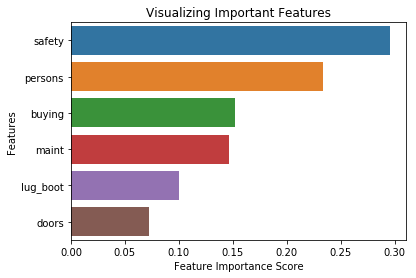

In [25]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

# **17. Build Random Forest model on selected features** <a class="anchor" id="17"></a>

[Table of Contents](#0.1)


Now, I will drop the least important feature `doors` from the model, rebuild the model and check its effect on accuracy.

In [26]:
# declare feature vector and target variable

X = df.drop(['class', 'doors'], axis=1)

y = df['class']

In [27]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


Now, I will build the random forest model and check accuracy.

In [28]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [29]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score 

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with doors variable removed : 0.9264


I have removed the `doors` variable from the model, rebuild it and checked its accuracy. The accuracy of the model with `doors` variable removed is 0.9264. The accuracy of the model with all the variables taken into account is 0.9247. So, we can see that the model accuracy has been improved with `doors` variable removed from the model.

Furthermore, the second least important model is `lug_boot`. If I remove it from the model and rebuild the model, then the accuracy was found to be 0.8546. It is a significant drop in the accuracy. So, I will not drop it from the model.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.


But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making. 


We have another tool called `Confusion matrix` that comes to our rescue.

# **18. Confusion matrix** <a class="anchor" id="18"></a>

[Table of Contents](#0.1)



A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


In [30]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)



Confusion matrix

 [[107   8   7   7]
 [  0  17   1   2]
 [ 10   0 387   0]
 [  3   4   0  18]]


# **19. Classification Report** <a class="anchor" id="19"></a>

[Table of Contents](#0.1)


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.89      0.83      0.86       129
        good       0.59      0.85      0.69        20
       unacc       0.98      0.97      0.98       397
       vgood       0.67      0.72      0.69        25

    accuracy                           0.93       571
   macro avg       0.78      0.84      0.81       571
weighted avg       0.93      0.93      0.93       571



# **20. Results and conclusion** <a class="anchor" id="20"></a>

[Table of Contents](#0.1)


1.	In this project, I build a Random Forest Classifier to predict the safety of the car. I build two models, one with 10 decision-trees and another one with 100 decision-trees. 
2.	The model accuracy score with 10 decision-trees is 0.9247 but the same with 100 decision-trees is 0.9457. So, as expected accuracy increases with number of decision-trees in the model.
3.	I have used the Random Forest model to find only the important features, build the model using these features and see its effect on accuracy. The most important feature is `safety` and least important feature is `doors`.
4.	I have removed the `doors` variable from the model, rebuild it and checked its accuracy. The accuracy of the model with `doors` variable removed is 0.9264. The accuracy of the model with all the variables taken into account is 0.9247. So, we can see that the model accuracy has been improved with `doors` variable removed from the model.
5.	The second least important model is `lug_boot`. If I remove it from the model and rebuild the model, then the accuracy was found to be 0.8546. It is a significant drop in the accuracy. So, I will not drop it from the model.
6.	Confusion matrix and classification report are another tool to visualize the model performance. They yield good performance.



# **21. References** <a class="anchor" id="21"></a>

[Table of Contents](#0.1)


The work done in this project is inspired from following books and websites:-

1. Hands on Machine Learning with Scikit-Learn and Tensorflow by Aurélién Géron

2. Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido

3. https://en.wikipedia.org/wiki/Random_forest

4. https://www.datacamp.com/community/tutorials/random-forests-classifier-python

5. http://dataaspirant.com/2017/05/22/random-forest-algorithm-machine-learing/

6. https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/

So, now we will come to the end of this kernel.

I hope you find this kernel useful and enjoyable.

Your comments and feedback are most welcome.

Thank you


[Go to Top](#0)